In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# %matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import random
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')##出現提示欄進行授權
os.chdir('/content/drive/My Drive/Colab Notebooks/kaggle-sklearn') #切換該目錄
os.listdir() #確認目錄內容

Mounted at /content/drive


['libs',
 'sklearn_regression.ipynb',
 'data',
 'catboost_info',
 'classifier_heart_failure.ipynb',
 'sklearn_classifier.ipynb']

In [4]:
df_set=datasets.load_breast_cancer()
print(df_set.keys())
print(df_set['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [5]:
TARGET='RESULT'

df_feature=pd.DataFrame(df_set['data'],columns=df_set['feature_names'])
df_target=pd.DataFrame(df_set['target'],columns=[TARGET])
df=pd.concat([df_feature,df_target],axis=1)
print(df.head())

   mean radius  mean texture  ...  worst fractal dimension  RESULT
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


## Analysis

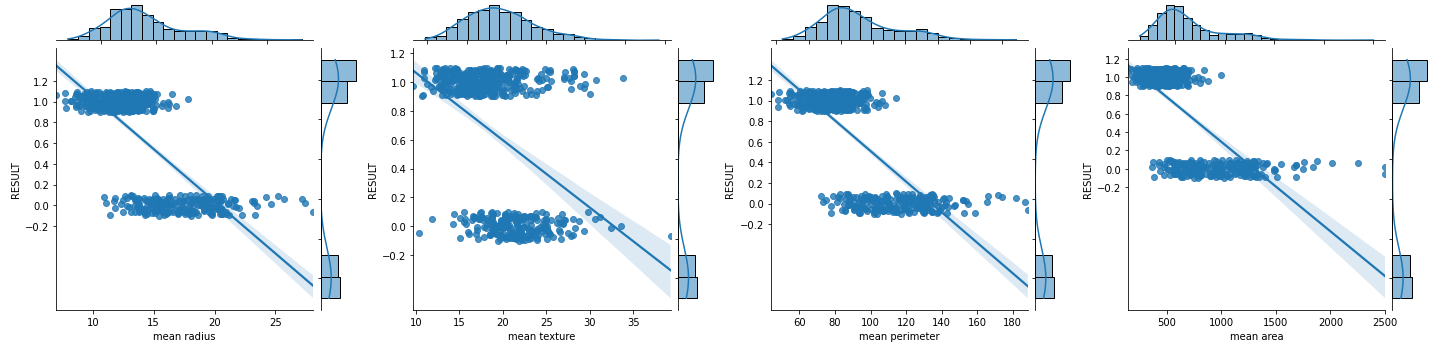

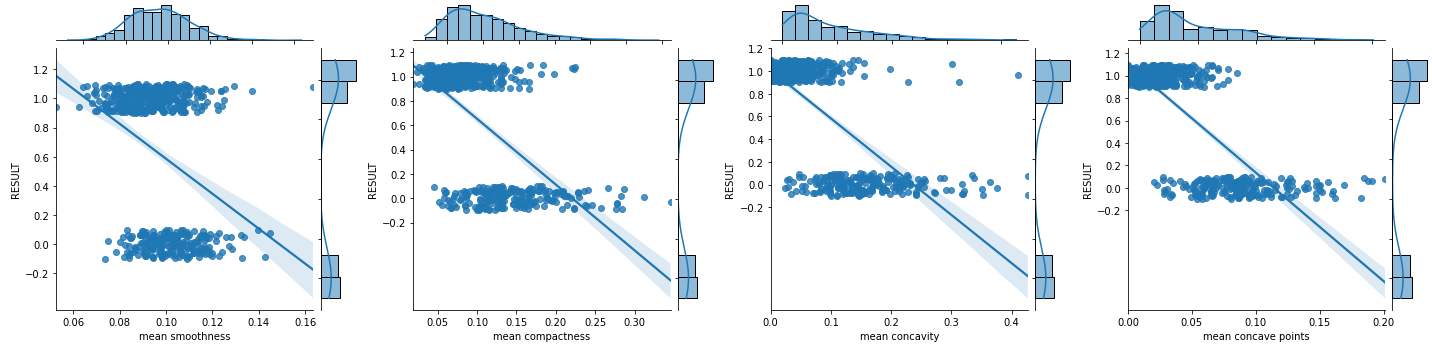

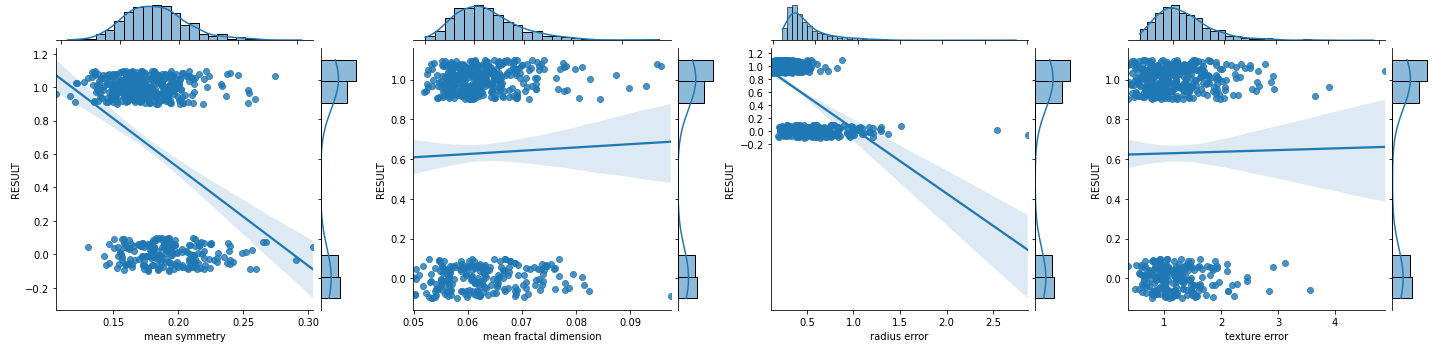

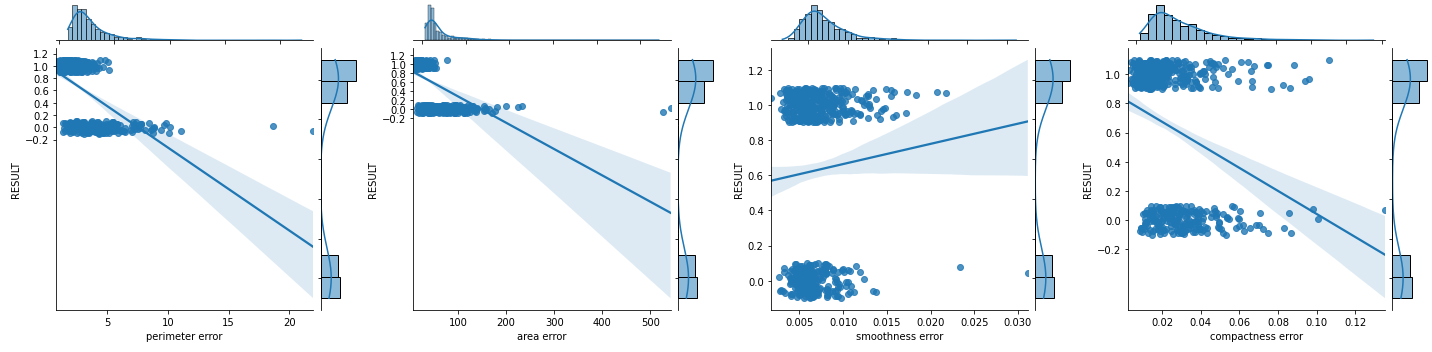

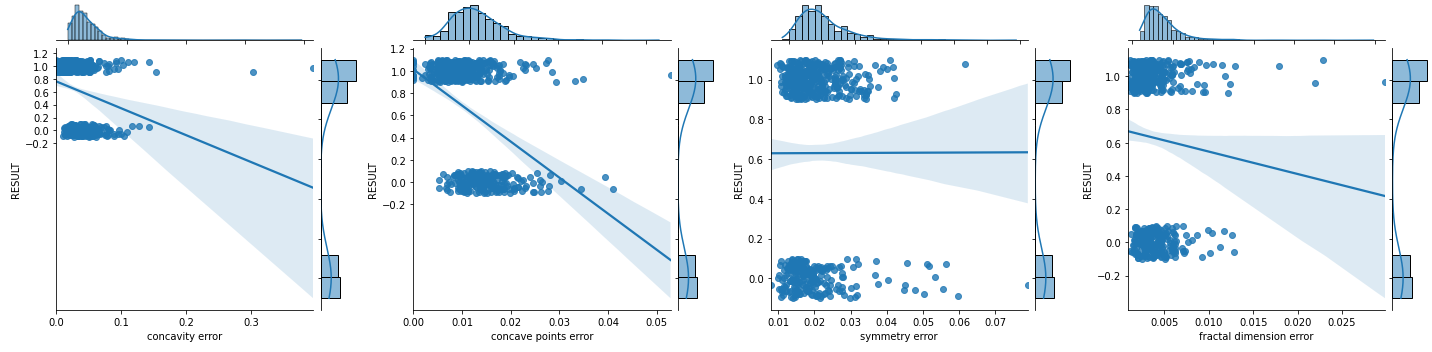

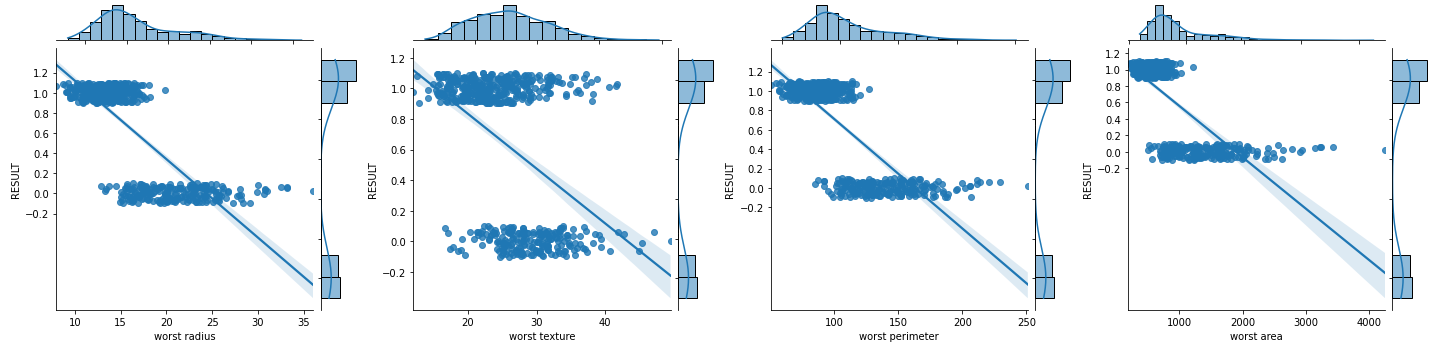

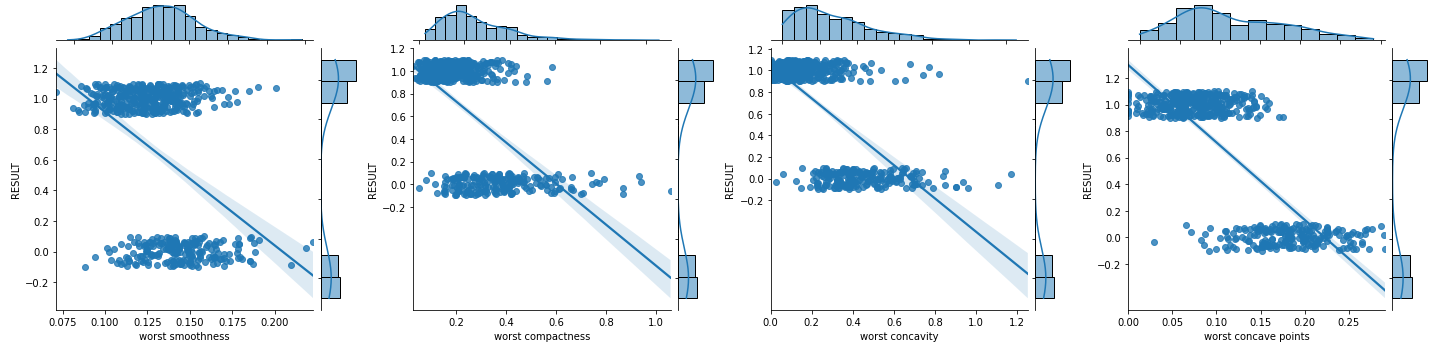

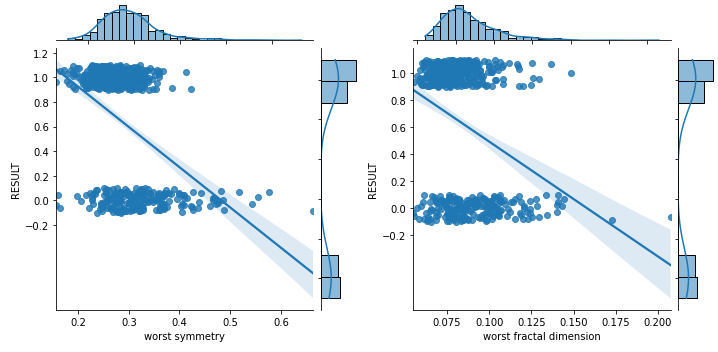

In [6]:
from libs.SeabornFig2Grid import SeabornFig2Grid
import matplotlib.gridspec as gridspec
#增強資料可視性
lst_tmp=[]
for i in range(len(df)):
  lst_tmp.append(random.uniform(-0.1,0.1))
df_plt=df.copy()
df_plt[TARGET]=df[TARGET]+lst_tmp
#繪製
for i in range(math.ceil(len(df_feature.columns)/4)):
  fig=plt.figure(figsize=(20,5))
  gs=gridspec.GridSpec(1, 4)
  for j in range(4):
    try:
      fig_tmp=sns.jointplot(x=list(df_feature)[(4*i+j)],y=TARGET,data=df_plt,kind='reg')
      mg=SeabornFig2Grid(fig_tmp, fig, gs[j])
    except IndexError:
      continue     
  gs.tight_layout(fig)
  plt.show()



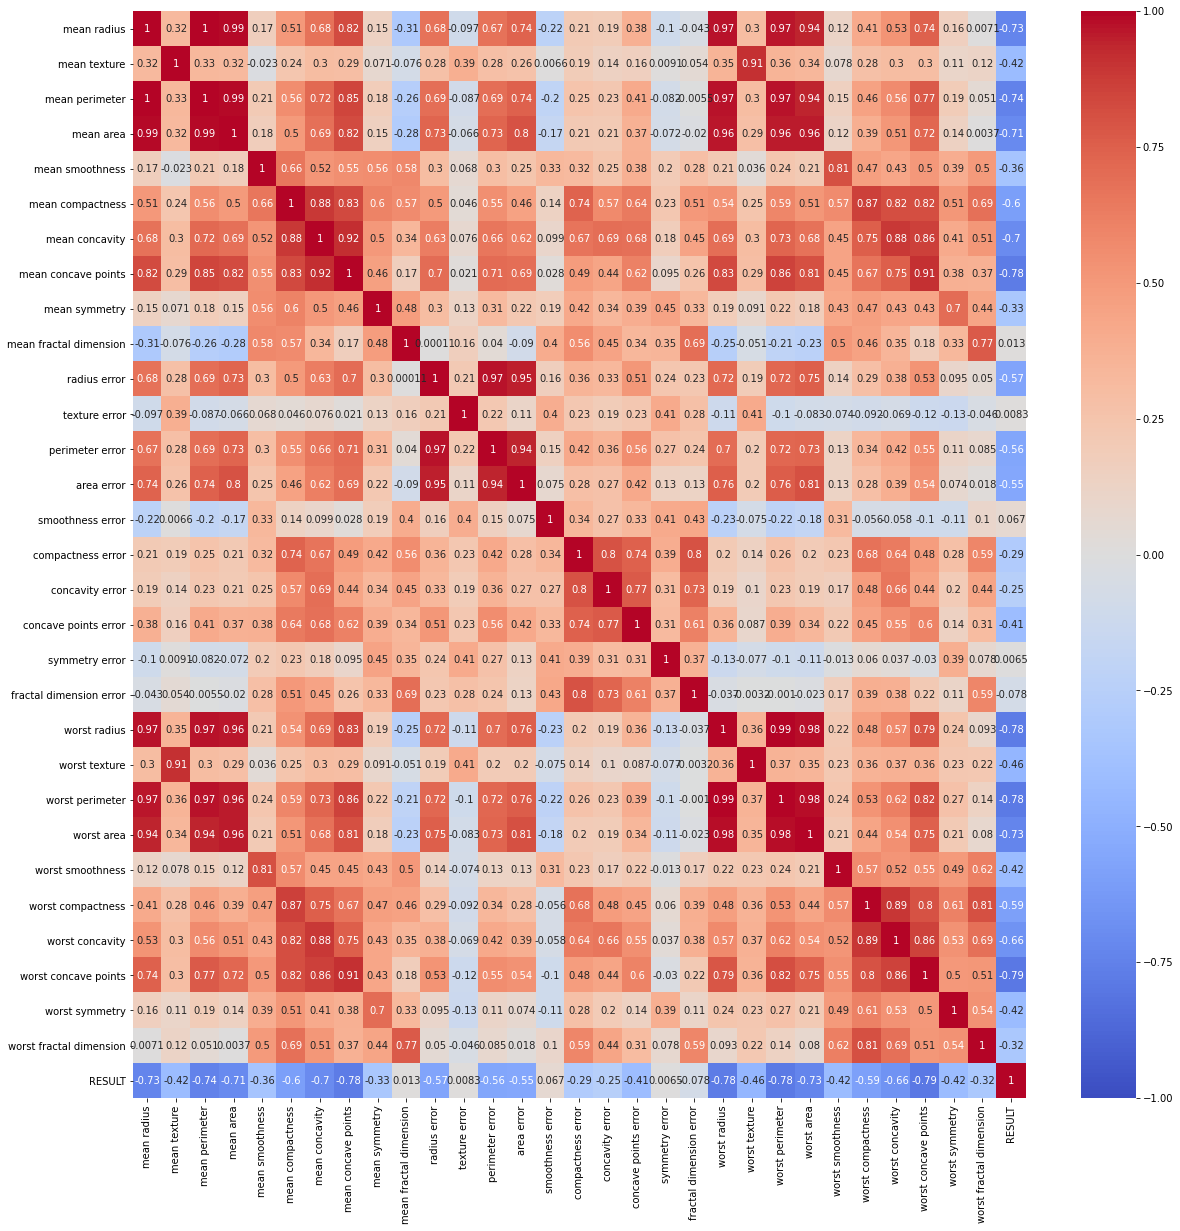

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

## Feature Select

In [14]:
df=df[['mean perimeter','mean concave points','worst radius','worst perimeter','worst concave points',TARGET]]
print(df.head())

   mean perimeter  mean concave points  ...  worst concave points  RESULT
0          122.80              0.14710  ...                0.2654       0
1          132.90              0.07017  ...                0.1860       0
2          130.00              0.12790  ...                0.2430       0
3           77.58              0.10520  ...                0.2575       0
4          135.10              0.10430  ...                0.1625       0

[5 rows x 6 columns]


## Training Prepare

In [17]:
#Training set & Testing set
X=df[df.columns[:-1]].values
Y=df[df.columns[-1]].values
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2, random_state=0)
X.mean()
#StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(train_X)
train_X_std=sc.transform(train_X)
test_X_std=sc.transform(test_X)

In [16]:
def training(method):
  classifier = method
  classifier.fit(train_X, train_Y)
  print(classifier.fit(train_X, train_Y))

  pred_Y = classifier.predict(test_X)
  test_prob=np.ravel(classifier.predict_proba(test_X)[:,[1]])
  df_pred = pd.DataFrame({'Actual': test_Y, 'Predicted': pred_Y,'Probability':test_prob}).round(3)
  df_pred['Error']=df_pred['Predicted']-df_pred['Actual']
  df_pred=df_pred.sort_values(by='Actual').reset_index(drop=True)
  max_value=max([df_pred['Actual'].max(),df_pred['Predicted'].max()])

  #plot
  plt.figure(figsize=(25,3))
  plt.bar(df_pred.index,df_pred['Probability'],width=0.5,zorder=1)
  plt.bar(df_pred[df_pred['Error']!=0].index,df_pred[df_pred['Error']!=0]['Probability'],width=0.5,zorder=1,color='r')
  plt.scatter(df_pred.index,df_pred['Predicted'],c='r',s=12,zorder=3)
  plt.scatter(df_pred.index,df_pred['Actual'],zorder=2,c='g')
  plt.xticks(df_pred.index,df_pred['Probability'].round(3),rotation=90)
  plt.legend(['predict','actual','prob','Predict_error prob'])
  plt.grid() 
  plt.show()
   
  print('Accuracy Score:', round(metrics.accuracy_score(test_Y,pred_Y,normalize=True),5))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


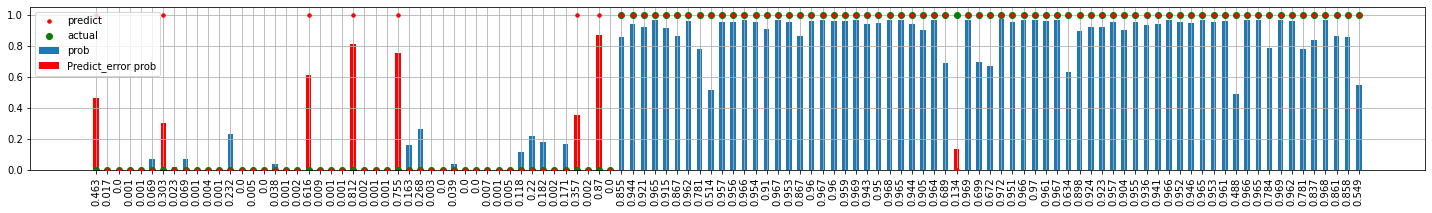

Accuracy Score: 0.9298245614035088


In [ ]:
from sklearn.svm import SVC
training(SVC(probability=True))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


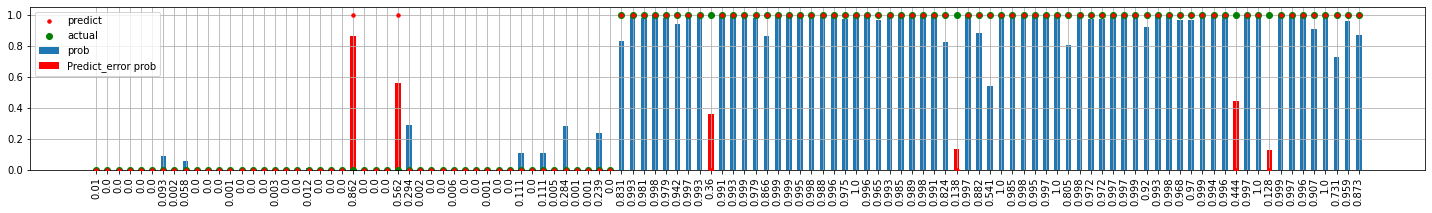

Accuracy Score: 0.9473684210526315


In [ ]:
from sklearn.linear_model import LogisticRegression
training(LogisticRegression())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


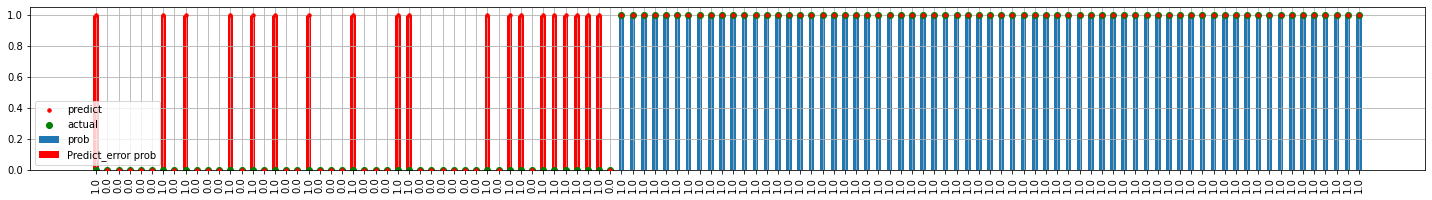

Accuracy Score: 0.8333333333333334


In [ ]:
from sklearn.linear_model import SGDClassifier
training(SGDClassifier(loss='modified_huber'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


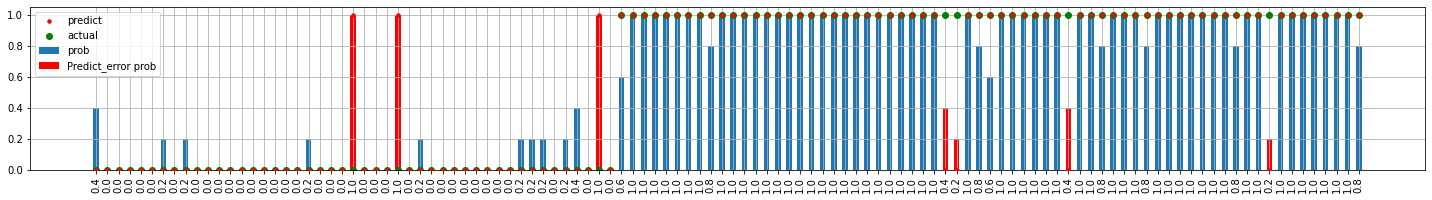

Accuracy Score: 0.9385964912280702


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
training(KNeighborsClassifier())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


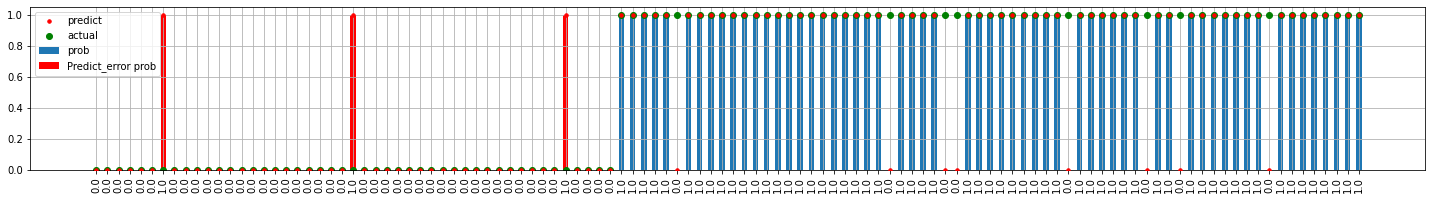

Accuracy Score: 0.9035087719298246


In [ ]:
from sklearn.tree import DecisionTreeClassifier
training(DecisionTreeClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


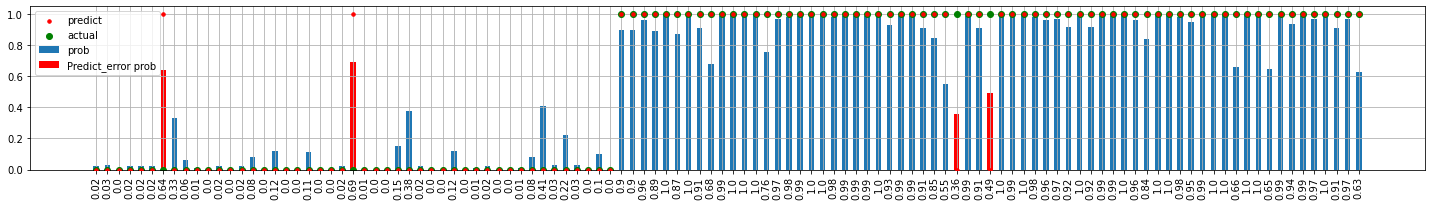

Accuracy Score: 0.9649122807017544


In [ ]:
from sklearn.ensemble import RandomForestClassifier
training(RandomForestClassifier())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


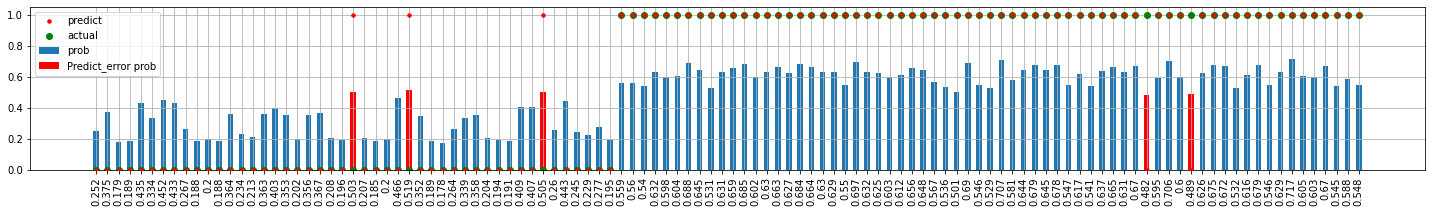

Accuracy Score: 0.956140350877193


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
training(AdaBoostClassifier())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


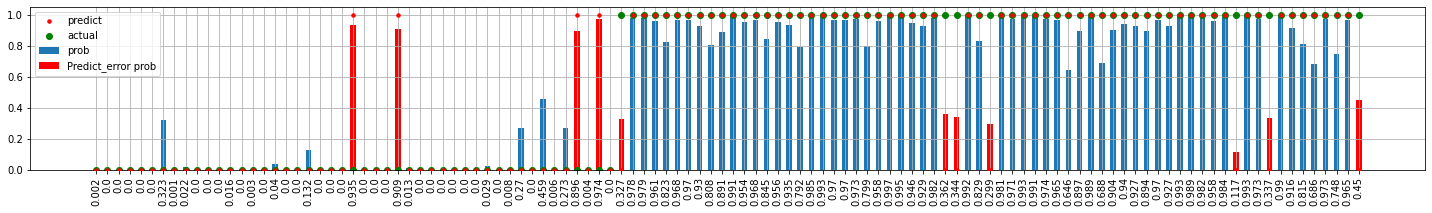

Accuracy Score: 0.9035087719298246


In [ ]:
from sklearn.neural_network import MLPClassifier
training(MLPClassifier())

Learning rate set to 0.00736
0:	learn: 0.6802671	total: 3.23ms	remaining: 3.22s
1:	learn: 0.6685036	total: 5.19ms	remaining: 2.59s
2:	learn: 0.6583640	total: 7.14ms	remaining: 2.37s
3:	learn: 0.6486373	total: 9.14ms	remaining: 2.28s
4:	learn: 0.6370681	total: 11.1ms	remaining: 2.21s
5:	learn: 0.6263532	total: 13ms	remaining: 2.16s
6:	learn: 0.6149158	total: 14.9ms	remaining: 2.12s
7:	learn: 0.6031016	total: 16.9ms	remaining: 2.1s
8:	learn: 0.5921064	total: 18.8ms	remaining: 2.07s
9:	learn: 0.5817440	total: 20.8ms	remaining: 2.06s
10:	learn: 0.5708833	total: 22.7ms	remaining: 2.04s
11:	learn: 0.5608041	total: 24.6ms	remaining: 2.02s
12:	learn: 0.5511936	total: 26.6ms	remaining: 2.02s
13:	learn: 0.5413264	total: 28.5ms	remaining: 2s
14:	learn: 0.5326316	total: 30.4ms	remaining: 2s
15:	learn: 0.5235075	total: 32.4ms	remaining: 1.99s
16:	learn: 0.5140192	total: 34.4ms	remaining: 1.99s
17:	learn: 0.5059969	total: 36.4ms	remaining: 1.99s
18:	learn: 0.4971633	total: 38.4ms	remaining: 1.98s
19

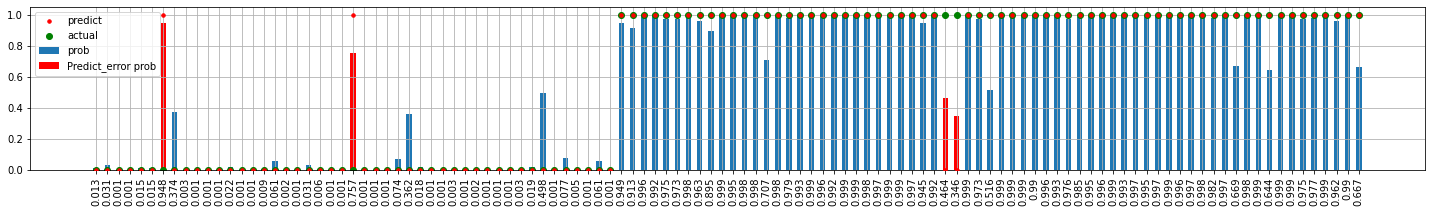

Accuracy Score: 0.96491


In [18]:
!pip install catboost
from catboost import CatBoostClassifier
training(CatBoostClassifier())